In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("C:/Users/sumit/Downloads/loan.csv")

In [31]:
data.head(4)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,0,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,2,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,0,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,0,1


In [87]:
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# fill Null vales

In [5]:
data["Loan_Status"].unique()

array(['Y', 'N'], dtype=object)

In [6]:
data["Gender"] = data["Gender"].fillna(data["Gender"].mode()[0])

In [7]:
data["Married"] = data["Married"].fillna(data["Married"].mode()[0])

In [8]:
data["Dependents"] = data["Dependents"].replace("3+" ,"3")

In [9]:
data["Dependents"] = pd.to_numeric(data["Dependents"], errors='coerce')

In [10]:
from sklearn.impute import SimpleImputer

In [11]:
si = SimpleImputer(strategy = "median")
data["Dependents"] = si.fit_transform(data[["Dependents"]])

In [12]:
data["Dependents"] = data["Dependents"].astype(int)

In [13]:
data["Self_Employed"] = data["Self_Employed"].fillna(data["Self_Employed"].mode()[0])

In [14]:
si1 = SimpleImputer(strategy='median')
data["LoanAmount"] = si1.fit_transform(data[["LoanAmount"]])

In [15]:
si2= SimpleImputer(strategy='median')
data["Loan_Amount_Term"] = si2.fit_transform(data[["Loan_Amount_Term"]])

In [16]:
si3= SimpleImputer(strategy='median')
data["Credit_History"] = si3.fit_transform(data[["Credit_History"]])

# Encoding

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
le = LabelEncoder()
le.fit(data["Gender"])

LabelEncoder()

In [19]:
data["Gender"] = le.transform(data["Gender"])

In [20]:
le1 = LabelEncoder()
le1.fit(data["Married"])

LabelEncoder()

In [21]:
data["Married"] = le1.transform(data["Married"])

In [22]:
le2 = LabelEncoder()
le2.fit(data["Education"])

LabelEncoder()

In [23]:
data["Education"] = le2.transform(data["Education"])

In [24]:
le3 = LabelEncoder()
le3.fit(data["Self_Employed"])

LabelEncoder()

In [25]:
data["Self_Employed"] = le3.transform(data["Self_Employed"])

In [26]:
le4 = LabelEncoder()
le4.fit(data["Loan_Status"])

LabelEncoder()

In [27]:
data["Loan_Status"] = le4.transform(data["Loan_Status"])

# by map function

In [28]:
pro_en = {"Urban":0,"Semiurban":1,"Rural":2}

In [29]:
data["Property_Area"] = data["Property_Area"].map(pro_en)

In [33]:
data.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,0,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,2,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,0,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,0,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,0,1


In [32]:
data = data.drop("Loan_ID", axis=1)

# Train_test_split

In [34]:
x = data.iloc[:,:-1]
y=data["Loan_Status"]

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

In [38]:
from sklearn.preprocessing import StandardScaler

In [93]:
ss = StandardScaler()
x_train_scaled = ss.fit_transform(x_train,y_train)

In [94]:
x_test_scaled = ss.transform(x_test)

# Exploratory Data Analysis (EDA)

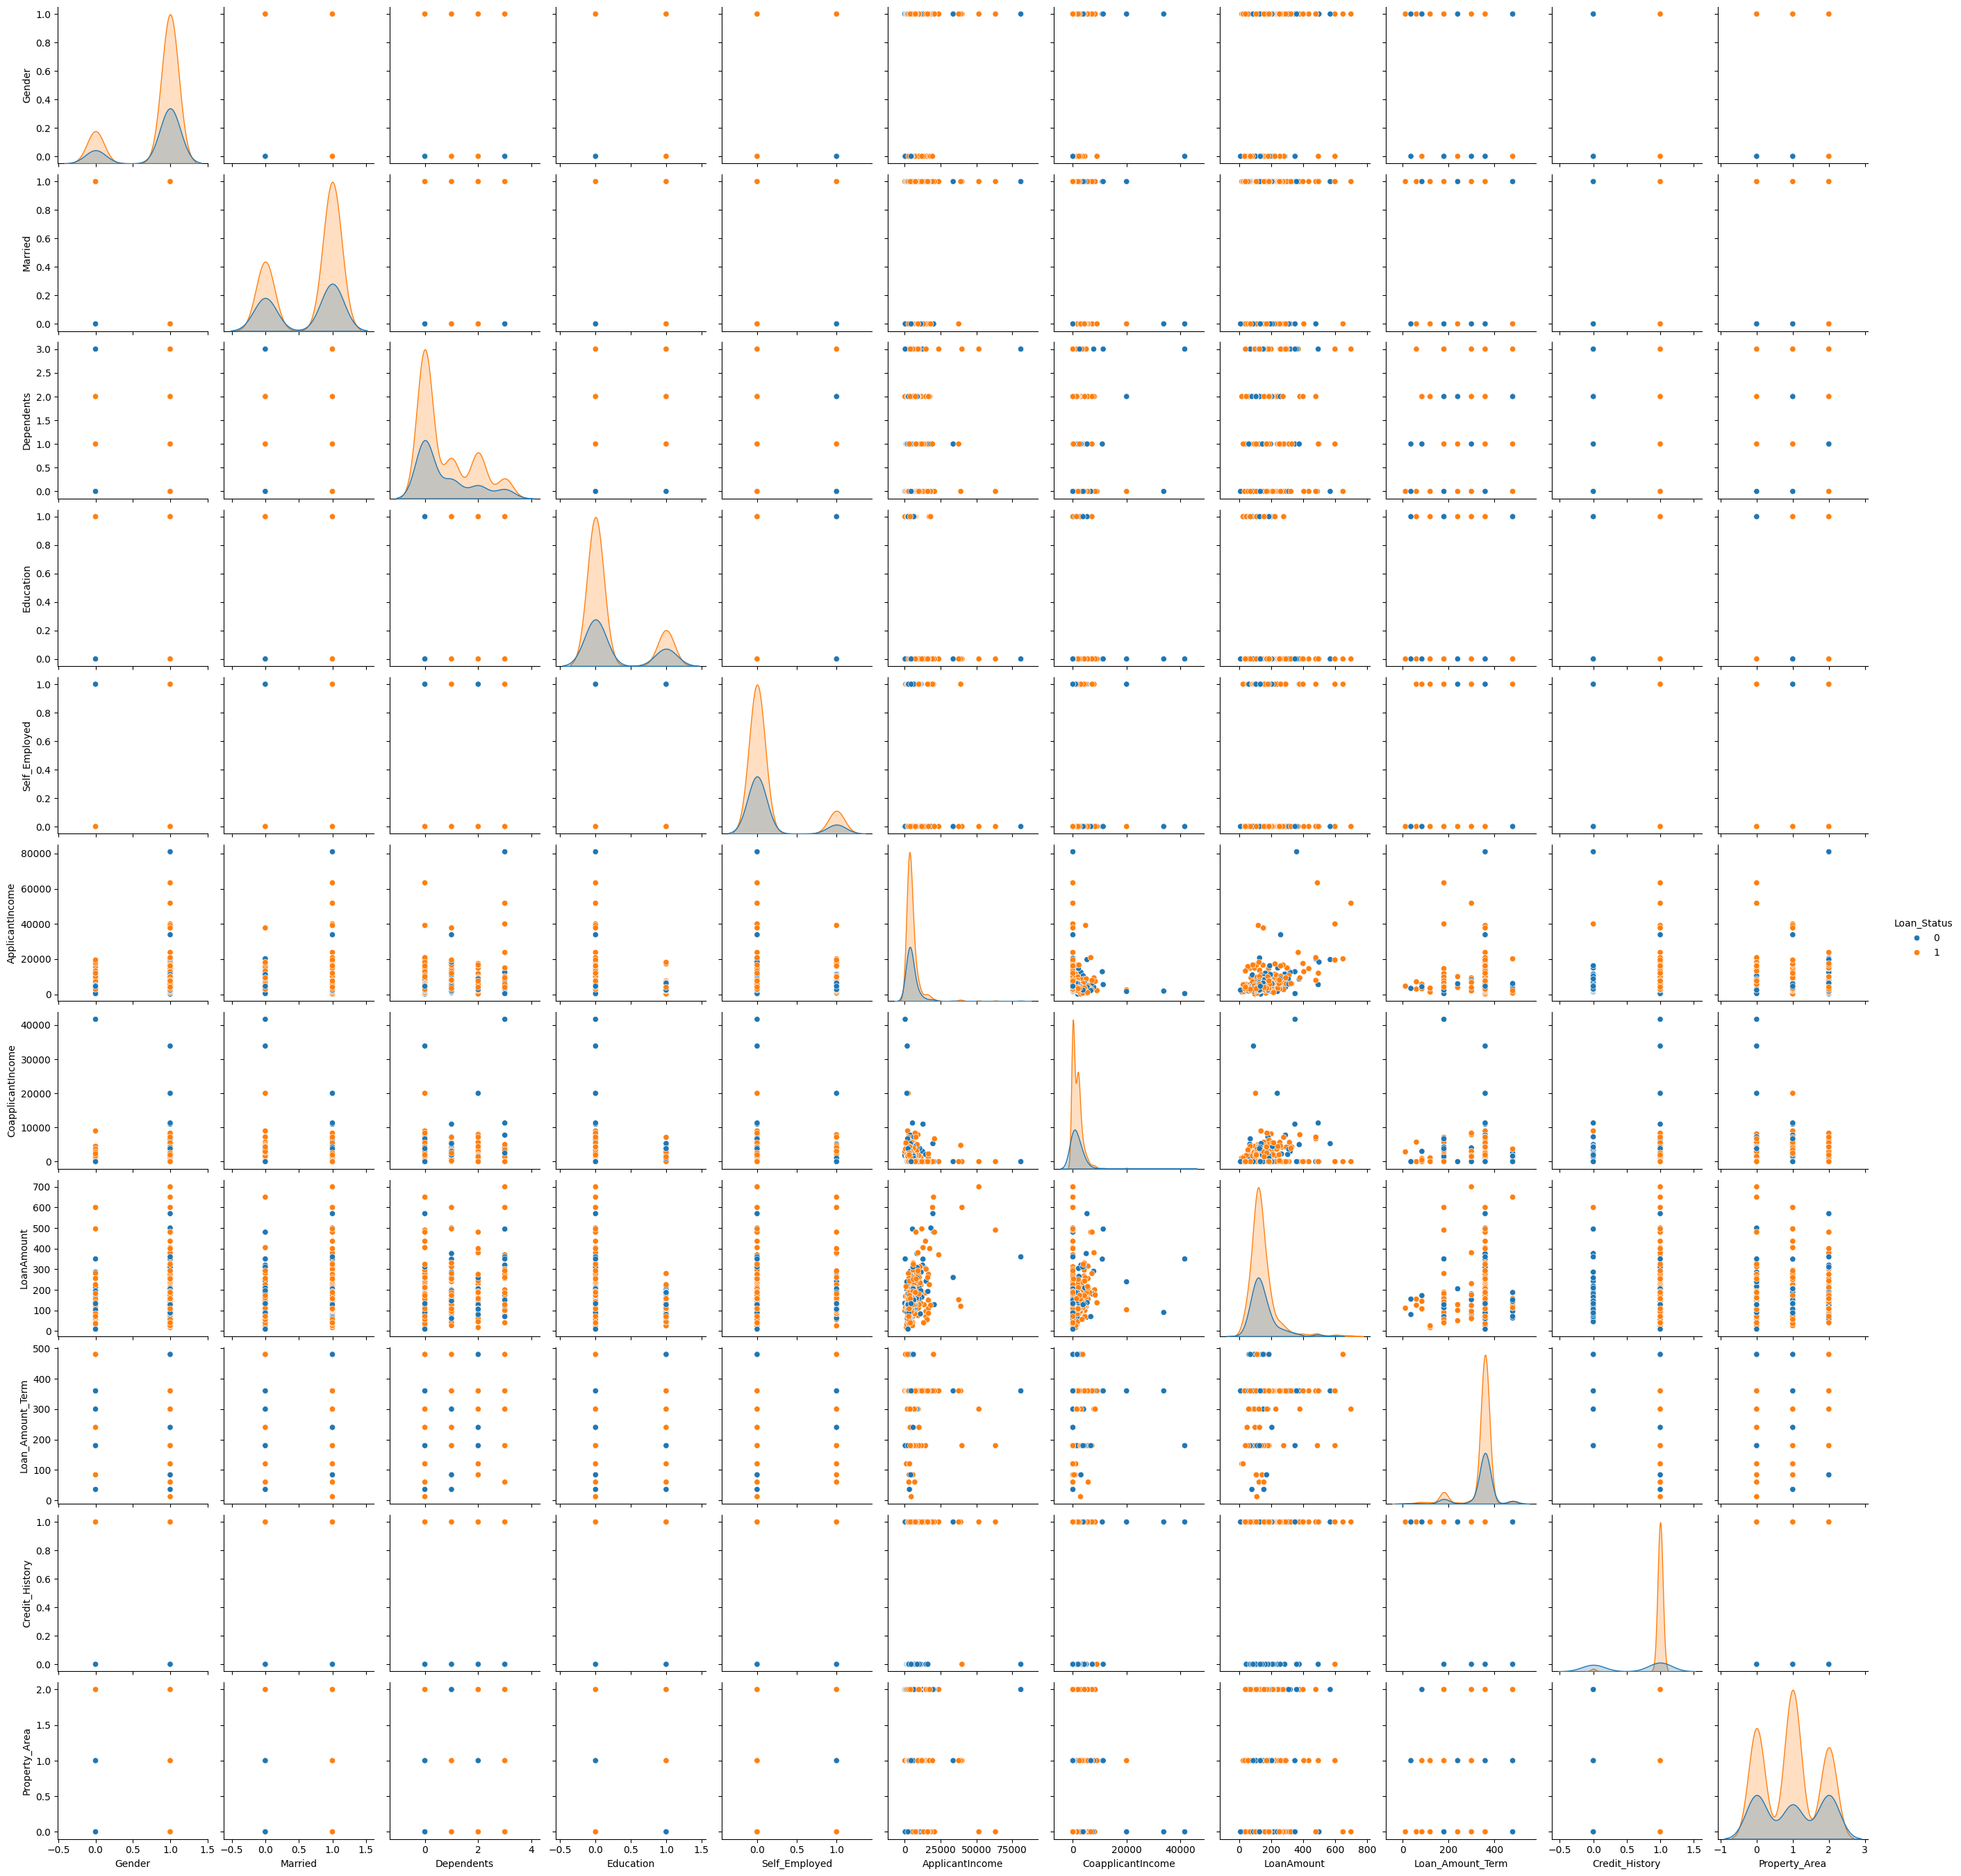

In [95]:
sns.pairplot(data ,hue = "Loan_Status")
plt.show()

C:\Users\sumit\AppData\Local\Temp\ipykernel_4436\453012654.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Loan_Status', data=data, palette='Set2')


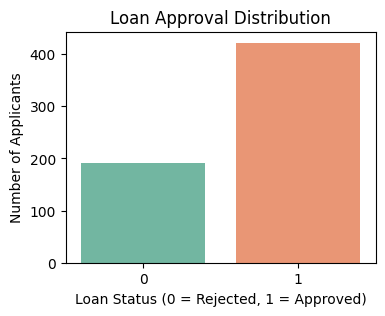

In [98]:
plt.figure(figsize = (4,3))
sns.countplot(x='Loan_Status', data=data, palette='Set2')
plt.title("Loan Approval Distribution") 
plt.xlabel("Loan Status (0 = Rejected, 1 = Approved)")
plt.ylabel("Number of Applicants")
plt.show()

In [99]:
#Loan Approval insights
#If the bar for 1 is taller → most applicants got their loans approved.
#If 0 is tall → more applicants were rejected.
#Useful to check for imbalanced data (e.g., 80% approved vs 20% rejected).

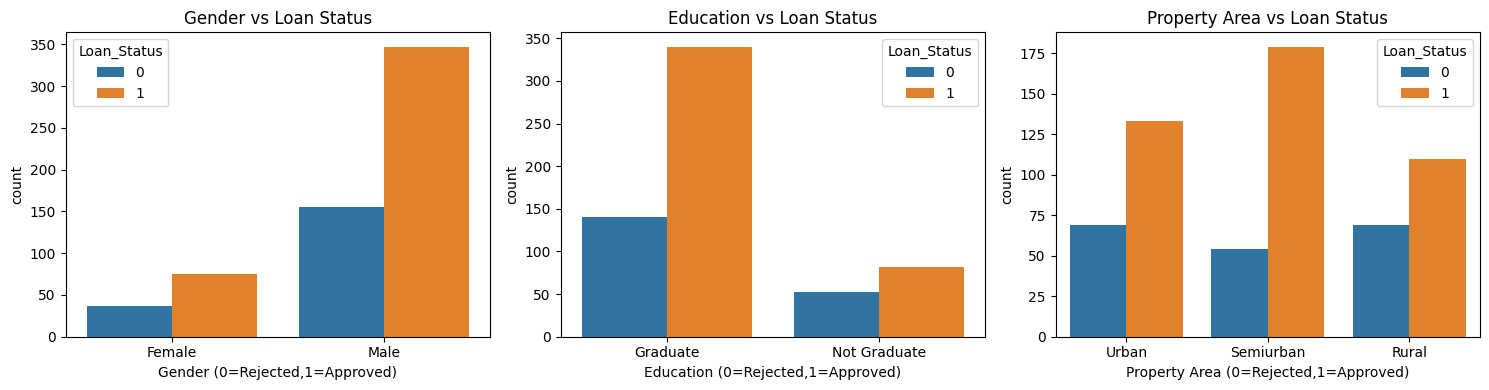

In [100]:
plt.figure(figsize=(15, 4))  

plt.subplot(1, 3, 1)   # 1 row, 3 columns, plot 1
sns.countplot(x='Gender', hue='Loan_Status', data=data)
plt.title("Gender vs Loan Status")
plt.xlabel("Gender (0=Rejected,1=Approved)")
plt.xticks([0, 1], ["Female","Male"])

plt.subplot(1, 3, 2)
sns.countplot(x='Education', hue='Loan_Status', data=data)
plt.title("Education vs Loan Status")
plt.xlabel("Education (0=Rejected,1=Approved)")
plt.xticks([0, 1], ['Graduate', 'Not Graduate'])

plt.subplot(1, 3, 3)
sns.countplot(x='Property_Area', hue='Loan_Status', data=data)
plt.title("Property Area vs Loan Status")
plt.xlabel("Property Area (0=Rejected,1=Approved)")
plt.xticks([0, 1, 2], ["Urban","Semiurban","Rural"])

plt.tight_layout()
plt.show()

In [101]:
#If the bar for Gender = Male has more orange → More males got loans approved.
#If Female has fewer applications or approvals → You can see imbalance.

#If graduates have higher approval bars → Education might influence loan approval.

#f Semiurban has a much higher orange bar → Most approvals came from that area.

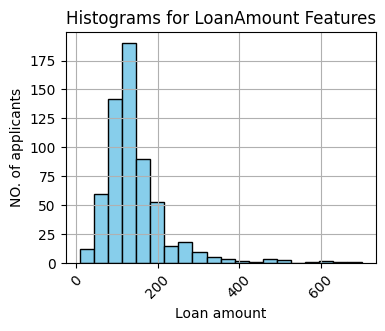

In [102]:
plt.figure(figsize = (4,3))
data['LoanAmount'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title("Histograms for LoanAmount Features")
plt.xticks(rotation = 45)
plt.ylabel("NO. of applicants")
plt.xlabel("Loan amount")
plt.show()

In [103]:
#Loan Amount insights
    #1)Most people have LoanAmount between 100 and 150 (tallest bar).
    #2)Very few people took loans above 250.

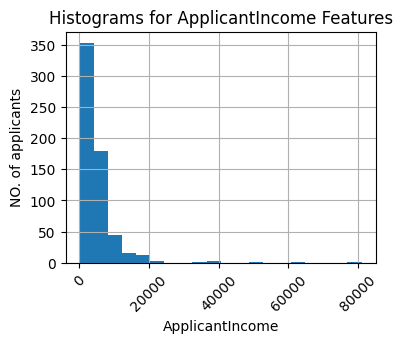

In [104]:
plt.figure(figsize = (4,3))
data['ApplicantIncome'].hist(bins=20)
plt.title("Histograms for ApplicantIncome Features")
plt.xticks(rotation = 45)
plt.ylabel("NO. of applicants")
plt.xlabel("ApplicantIncome")
plt.show()

In [105]:
#Majority earn under ₹5,000–₹10,000.
#This is typical of right-skewed data, where most values are low, and a few are very high.
#Some applicants earn ₹40,000–₹80,000, but they are very few.
#These outliers may affect algorithms like Linear Regression.

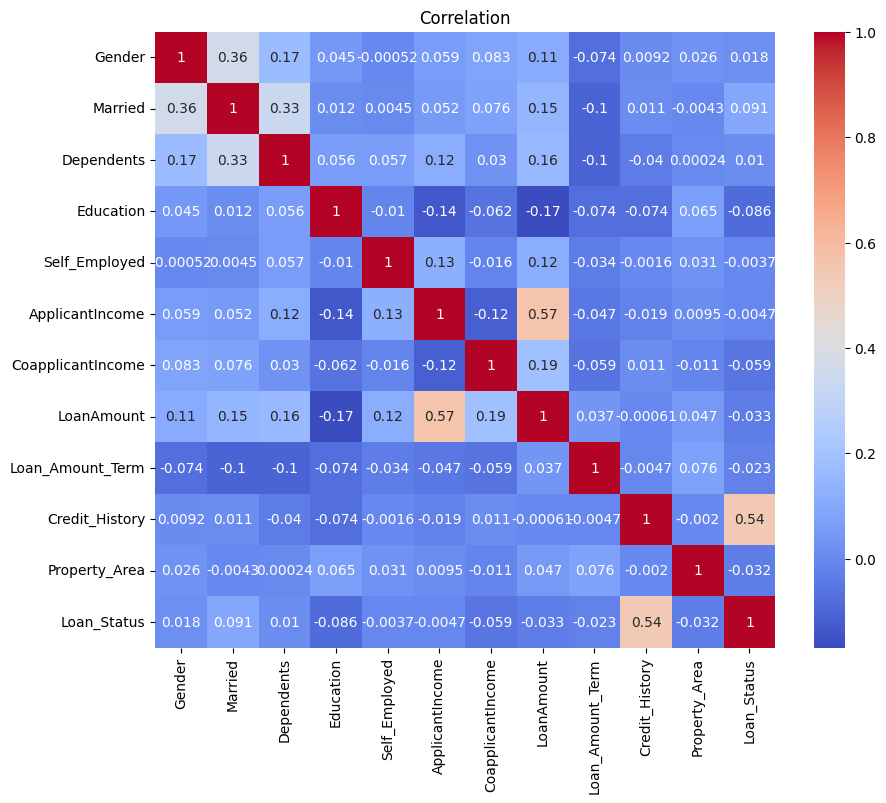

In [106]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation")
plt.show()

In [107]:
#Feature Pair	                 Correlation               	Meaning
#ApplicantIncome vs LoanAmount	  +0.57	         Higher income → likely to request higher loan
#Loan_Status vs Credit_History	  +0.54	         Strong positive → good credit history → approval
#Loan_Status vs LoanAmount	      -0.033	     Very weak or no relationship

# Model

In [108]:
#Try:
    #Logistic Regression
    #Decision Tree
    #Random Forest
    #Voting Classifier
    #Bagging

In [109]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,BaggingClassifier

In [110]:
lr = LogisticRegression()
lr.fit(x_train_scaled,y_train)

LogisticRegression()

In [112]:
lr.score(x_train_scaled,y_train)*100 , lr.score(x_test_scaled,y_test)*100

(81.87372708757637, 78.86178861788618)

In [113]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [114]:
dt.score(x_train,y_train)*100 , dt.score(x_test,y_test)*100

(100.0, 73.17073170731707)

In [115]:
rf = RandomForestClassifier(n_estimators = 7)
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=7)

In [116]:
rf.score(x_train,y_train)*100 , rf.score(x_test,y_test)*100

(97.75967413441956, 77.23577235772358)

# Voting classifier

In [156]:
from sklearn.pipeline import Pipeline

In [157]:
li = [("dt",DecisionTreeClassifier()),("lr",Pipeline([("scaler",StandardScaler()),("model",LogisticRegression(max_iter=100))])),("rf",RandomForestClassifier())]

In [158]:
vc = VotingClassifier(li,voting='hard')
vc.fit(x_train, y_train) 

VotingClassifier(estimators=[('dt', DecisionTreeClassifier()),
                             ('lr',
                              Pipeline(steps=[('scaler', StandardScaler()),
                                              ('model',
                                               LogisticRegression())])),
                             ('rf', RandomForestClassifier())])

In [159]:
prd = {"dt":dt.predict(x_test),"lr":lr.predict(x_test),"rf":rf.predict(x_test),"vc":vc.predict(x_test)}

C:\Users\sumit\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [162]:
pd.DataFrame(prd).head(4)

,dt,lr,rf,vc
0,1,0,1,1
1,1,0,1,1
2,1,0,1,1
3,0,0,1,1


In [165]:
bg = BaggingClassifier(estimator= dt,n_estimators = 8)
bg.fit(x_train,y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=8)

In [166]:
bg.score(x_train,y_train)*100 , bg.score(x_test,y_test)*100

(97.5560081466395, 73.98373983739837)

# Confusion matrix

In [180]:
#To evaluate your classification models using:
    #Accuracy
    #Confusion Matrix
    #Classification Report

In [181]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [182]:
y_pred_dt = dt.predict(x_test)
y_pred_lr = lr.predict(x_test)
y_pred_rf = rf.predict(x_test)
y_pred_vc = vc.predict(x_test)

C:\Users\sumit\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [183]:
def evaluate_model(name, y_test, y_pred):
    print(f"\n=== {name} ===")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

In [184]:
evaluate_model("Decision Tree", y_test, y_pred_dt)
evaluate_model("Logistic Regression", y_test, y_pred_lr)
evaluate_model("Random Forest", y_test, y_pred_rf)
evaluate_model("Voting Classifier", y_test, y_pred_vc)


=== Decision Tree ===
Accuracy: 0.7317073170731707
Confusion Matrix:
 [[26 17]
 [16 64]]
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.60      0.61        43
           1       0.79      0.80      0.80        80

    accuracy                           0.73       123
   macro avg       0.70      0.70      0.70       123
weighted avg       0.73      0.73      0.73       123


=== Logistic Regression ===
Accuracy: 0.34959349593495936
Confusion Matrix:
 [[43  0]
 [80  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.35      1.00      0.52        43
           1       0.00      0.00      0.00        80

    accuracy                           0.35       123
   macro avg       0.17      0.50      0.26       123
weighted avg       0.12      0.35      0.18       123


=== Random Forest ===
Accuracy: 0.7723577235772358
Confusion Matrix:
 [[20 23]
 [ 5 75]]
Classification Report

C:\Users\sumit\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sumit\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sumit\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [185]:
def plot_confusion_heatmap(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

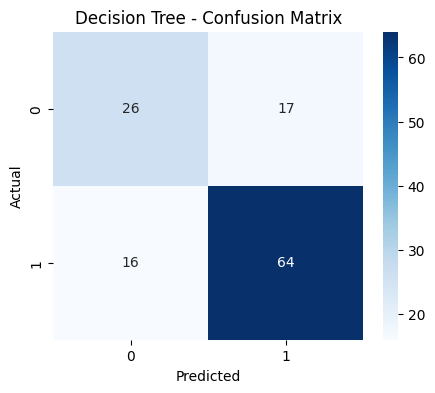

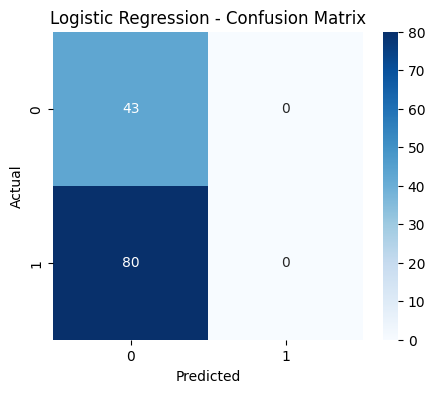

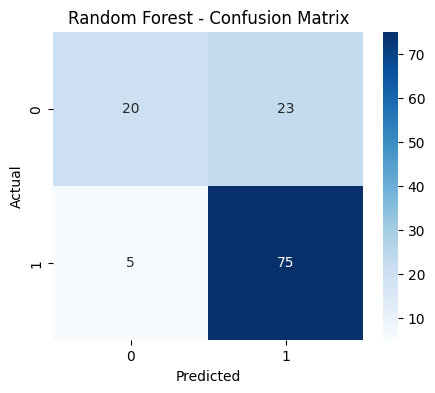

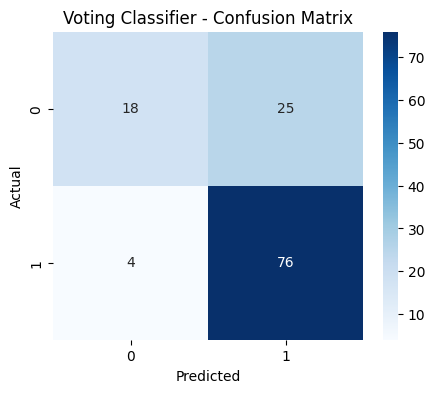

In [186]:
plot_confusion_heatmap(y_test, y_pred_dt, "Decision Tree")
plot_confusion_heatmap(y_test, y_pred_lr, "Logistic Regression")
plot_confusion_heatmap(y_test, y_pred_rf, "Random Forest")
plot_confusion_heatmap(y_test, y_pred_vc, "Voting Classifier")

In [190]:
# Example with Logistic Regression
probs = lr.predict_proba(x_test)[:, 1]  # Probability of being approved (class 1)

# Define risk as inverse confidence
risk_score = 1 - probs  # Higher score = higher risk

# Attach to your DataFrame
results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': lr.predict(x_test),
    'Probability': probs,
    'Risk_Score': risk_score
})


C:\Users\sumit\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\sumit\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
